# Homework 5

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# Section 1: Harvard Case

*This section will not be graded, but it will be discussed in class.*

**Smart Beta Exchange-Traded-Funds and Factor Investing**.

* The case is a good introduction to important pricing factors.
* It also gives useful introduction and context to ETFs, passive vs active investing, and so-called “smart beta” funds.

1. Describe how each of the factors (other than MKT) is measured.1That is, each factor is a portfolio of stocks–which stocks are included in the factor portfolio?

2. Is the factor portfolio...
* long-only
* long-short
* value-weighted
* equally-weighted

4. What steps are taken in the factor construction to try to reduce the correlation between the factors?
5. What is the point of figures 1-6?
6. How is a “smart beta” ETF different from a traditional ETF?
7. Is it possible for all investors to have exposure to the “value” factor?
8. How does factor investing differ from traditional diversification?


If you need more info in how these factor portfolios are created, see Ken French’s website, and the follow- details: 

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/det_mom_factor.html

***

# 2. The Factors

Use the data found in `factor_pricing_data.xlsx`.

* FACTORS: Monthly excess return data for the overall equity market, $\tilde{r}^{\text{MKT}}$.
* The column header to the market factor is `MKT` rather than `MKT-RF`, but it is indeed already in excess return form.
* The sheet also contains data on five additional factors.
* All factor data is already provided as excess returns

1. Analyze the factors, similar to how you analyzed the three Fama-French factors in Homework 4.
You now have three additional factors, so let’s compare there univariate statistics. • mean
• volatility
• Sharpe

2. Based on the factor statistics above, answer the following.
(a) Does each factor have a positive risk premium (positive expected excess return)? (b) How have the factors performed since the time of the case, (2015-present)?

3. Report the correlation matrix across the six factors.
* Does the construction method succeed in keeping correlations small?
* Fama and French say that HML is somewhat redundant in their 5-factor model. Does this seem to be the case?

4. Report the tangency weights for a portfolio of these 6 factors.
* Which factors seem most important? And Least?
* Are the factors with low mean returns still useful?
* Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD. Which factors get high/low tangency weights now?

What do you conclude about the importance or unimportance of these styles?

* Part 1

In [16]:
import pandas as pd
import numpy as np

factors_excess_returns = pd.read_excel('factor_pricing_data.xlsx', sheet_name = 'factors (excess returns)').set_index('Date')
portfolio_excess_returns = pd.read_excel('factor_pricing_data.xlsx', sheet_name = 'portfolios (excess returns)').set_index('Date')
risk_free_rate = pd.read_excel('factor_pricing_data.xlsx', sheet_name = 'risk-free rate').set_index('Date')

In [17]:
def performance_summary(df):
    mean_lst = []
    vol_lst = []
    sharpe_lst = []
    for factor in df.columns:
        factor_mean = df[factor].mean() 
        factor_vol = df[factor].std() 
        factor_sharpe = factor_mean / factor_vol * np.sqrt(12)

        mean_lst.append(factor_mean * 12)
        vol_lst.append(factor_vol * np.sqrt(12))
        sharpe_lst.append(factor_sharpe * np.sqrt(12))
    
    return mean_lst, vol_lst, sharpe_lst 

In [18]:
total_mean_lst, total_vol_lst, total_sharpe_lst = performance_summary(factors_excess_returns)
factors_univariate_performance = pd.DataFrame({"Factors":factors_excess_returns.columns,"Mean":total_mean_lst,"Volatility":total_vol_lst,"Sharpe Ratio":total_sharpe_lst})
factors_univariate_performance.set_index('Factors')

,Mean,Volatility,Sharpe Ratio
Factors,,,
MKT,0.086277,0.156904,1.904811
SMB,0.008319,0.101873,0.282895
HML,0.025809,0.109999,0.812780
RMW,0.047096,0.083213,1.960550
CMA,0.029537,0.073084,1.400008
UMD,0.062709,0.154564,1.405435


* Part 2

Yes, each factor has positive expected excess return when analyzing them univariately.

In [19]:
factors_excess_returns_recent = factors_excess_returns['2015':]
recent_mean_lst, recent_vol_lst, recent_sharpe_lst = performance_summary(factors_excess_returns_recent)
recent_factors_univariate_performance = pd.DataFrame({"Factors":factors_excess_returns.columns,"Mean":recent_mean_lst,"Volatility":recent_vol_lst,"Sharpe Ratio":recent_sharpe_lst})
recent_factors_univariate_performance.set_index('Factors')

,Mean,Volatility,Sharpe Ratio
Factors,,,
MKT,0.116586,0.160285,2.519681
SMB,-0.019500,0.104524,-0.646260
HML,-0.017855,0.132709,-0.466075
RMW,0.050886,0.073338,2.403607
CMA,-0.008410,0.083989,-0.346883
UMD,0.021083,0.140812,0.518654


The performances have been considerably worse since 2015 with the factors SMB, HML, and CMA having negative excess returns on average.

* Part 3

<Axes: >

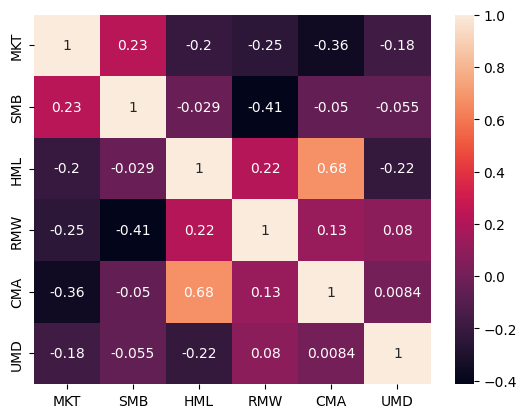

In [22]:
import seaborn as sns 

factor_correlations = factors_excess_returns.corr()
sns.heatmap(factor_correlations, annot=True)

The factors have low correlation with each other. The argument that HML could be dropped most likely comes from its high correlation with CMA, as well as the fact that its Sharpe ratio has been lower than CMA's.

* Part 4

In [23]:
# Helper Function

def calc_tangency_portfolio(mean_rets, cov_matrix):
    """
    NOTE: This *does not* assume access to the risk-free rate. Use
        Mark's portfolio.py for tangency/GMV/etc. portfolios.

    Function to calculate tangency portfolio weights. Comes from the
    formula seen in class.

    Args:
        mean_rets: Vector of mean returns.
        cov_matrix: Covariance matrix of returns.

    Returns:
        Vector of tangency portfolio weights.
    """
    inv_cov = np.linalg.inv(cov_matrix)
    ones = np.ones(mean_rets.shape)
    return (inv_cov @ mean_rets) / (ones.T @ (inv_cov @ mean_rets))


In [47]:
factor_covariance_matrix = factors_excess_returns.cov()
tangency_weights = calc_tangency_portfolio(np.array(total_mean_lst), factor_covariance_matrix)

pd.DataFrame({"Factors":factors_excess_returns.columns, "Mean": total_mean_lst, "Tangency Weights":tangency_weights}).set_index('Factors')

,Mean,Tangency Weights
Factors,,
MKT,0.086277,0.209760
SMB,0.008319,0.077337
HML,0.025809,-0.042142
RMW,0.047096,0.313263
CMA,0.029537,0.338982
UMD,0.062709,0.102798


The factors with the highest weights are RMW and CMA. The ones with the lowest weights are HML and SMB. Yes, some of the factors with low expected excess returns have high tangency weights, such as CMA.

In [49]:
adjusted_factors = factors_excess_returns[['MKT','SMB','HML','UMD']]
adjusted_mean_lst = total_mean_lst[0:3] + [total_mean_lst[5]]
adjusted_factor_covariance_matrix = adjusted_factors.cov()

adjusted_tangency_weights = calc_tangency_portfolio(np.array(adjusted_mean_lst), adjusted_factor_covariance_matrix)

pd.DataFrame({"Factors":adjusted_factors.columns, "Mean": adjusted_mean_lst, "Tangency Weights":adjusted_tangency_weights}).set_index('Factors')

,Mean,Tangency Weights
Factors,,
MKT,0.086277,0.365529
SMB,0.008319,-0.032422
HML,0.025809,0.356199
UMD,0.062709,0.310694


MKT, HML, and UMD have high weights. SMB has a low weight. SMB's consistently low weight could suggest that it is not important in the factor model. 

***

# 3. Testing Modern LPMs

Consider the following factor models:
* CAPM: MKT
* Fama-French 3F: MKT, SMB, HML
* Fama-French 5F: MKT, SMB, HML, RMW, CMA
* AQR: MKT, HML, RMW, UMD

We are not saying this is “the” AQR model, but it is a good illustration of their most publicized factors: value, momentum, and more recently, profitability.

For instance, for the AQR model is...

![](../refs/LFP-4-factors.png)

We will test these models with the time-series regressions. Namely, for each asset i, estimate the following regression to test the AQR model:

![](../refs/LFD-4-factors.png)

Data
* PORTFOLIOS: Monthly excess return data on 49 equity portfolios sorted by their industry. Denote these as $\tilde{r}^i$ , for $n = 1, . . . , 49.$

* You do NOT need the risk-free rate data. It is provided only for completeness. The other two tabs are already in terms of excess returns.

1. Test the AQR 4-Factor Model using the time-series test. (We are not doing the cross-sectional regression tests.)
* For each regression, report the estimated α and r-squared.
* Calculate the mean-absolute-error of the estimated alphas.
* If the pricing model worked, should these alpha estimates be large or small? Why?
* Based on your MAE stat, does this seem to support the pricing model or not?

2. Test the CAPM, FF 3-Factor Model and the the FF 5-Factor Model.
   * Report the MAE statistic for each of these models and compare it with the AQR Model MAE.
   * Which model fits best?
   
3. Does any particular factor seem especially important or unimportant for pricing? Do you think Fama and French should use the Momentum Factor?

4. This does not matter for pricing, but report the average (across $n$ estimations) of the time-series regression r-squared statistics.
   * Do this for each of the three models you tested.
   * Do these models lead to high time-series r-squared stats? That is, would these factors be good in a Linear Factor Decomposition of the assets?

5. We tested three models using the time-series tests (focusing on the time-series alphas.) Re-test these models, but this time use the cross-sectional test.
* Report the time-series premia of the factors (just their sample averages,) and compare to the cross-sectionally estimated premia of the factors. Do they differ substantially?4
* Report the MAE of the cross-sectional regression residuals for each of the four models. How do they compare to the MAE of the time-series alphas?

***

* Part 1

In [60]:
AQR_factors = factors_excess_returns[['MKT', 'SMB', 'RMW', 'UMD']]

In [93]:
import statsmodels.api as sm

def factor_regression(factors):
    alpha_lst = []
    r_squared_lst = []
    p_values_lst = []
    for portfolio in portfolio_excess_returns.columns: 
        X = sm.add_constant(factors)
        y = portfolio_excess_returns[portfolio]

        model = sm.OLS(y, X)
        results = model.fit()

        alpha_lst.append(results.params['const'])
        r_squared_lst.append(results.rsquared)
        p_values_lst.append(results.pvalues)
    
    return alpha_lst, r_squared_lst, p_values_lst

In [99]:
AQR_alpha_lst, AQR_r_squared_lst, AQR_p_values_lst = factor_regression(AQR_factors)

AQR_factors_df = pd.DataFrame({"Portfolio":portfolio_excess_returns.columns,"Alpha":AQR_alpha_lst,"R_Squared":AQR_r_squared_lst}).set_index("Portfolio")
AQR_factors_df.head()

,Alpha,R_Squared
Portfolio,,
Agric,0.000487,0.358785
Food,0.001293,0.450508
Soda,0.002054,0.299428
Beer,0.001740,0.423317
Smoke,0.003906,0.260417


In [100]:
# MAE

AQR_mae = abs(AQR_factors_df['Alpha']).sum() / len(AQR_factors_df['Alpha'])
AQR_mae

0.0018602817198713048

If the mean pricing model is accurate, the MAE should be ~0. The MAE stat of 0.001 is pretty close to 0, thus the pricing model is supported.

* Part 2

In [101]:
# CAPM model

capm_factors = factors_excess_returns[['MKT']]
capm_alpha_lst, capm_r_squared_lst, capm_p_values_lst = factor_regression(capm_factors)
CAPM_factors_df = pd.DataFrame({"Portfolio":portfolio_excess_returns.columns,"Alpha":capm_alpha_lst,"R_Squared":capm_r_squared_lst}).set_index("Portfolio")
CAPM_factors_df.head()


,Alpha,R_Squared
Portfolio,,
Agric,0.001695,0.330534
Food,0.003818,0.366464
Soda,0.003923,0.253740
Beer,0.004953,0.333662
Smoke,0.006770,0.189975


In [102]:
# CAPM MAE

CAPM_mae = abs(CAPM_factors_df['Alpha']).sum() / len(CAPM_factors_df['Alpha'])
CAPM_mae

0.0017001307693664564

In [103]:
# 3FF

three_ff_factors = factors_excess_returns[['MKT','SMB','HML']]
three_ff_alpha_lst, three_ff_r_squared_lst, three_ff_p_values_lst = factor_regression(three_ff_factors)
three_ff_factors_df = pd.DataFrame({"Portfolio":portfolio_excess_returns.columns,"Alpha":three_ff_alpha_lst,"R_Squared":three_ff_r_squared_lst}).set_index("Portfolio")
three_ff_factors_df.head()

,Alpha,R_Squared
Portfolio,,
Agric,0.001344,0.357393
Food,0.002980,0.416709
Soda,0.002899,0.280459
Beer,0.004569,0.362360
Smoke,0.005512,0.236211


In [104]:
# 3FF MAE

three_ff_mae = abs(three_ff_factors_df['Alpha']).sum() / len(three_ff_factors_df['Alpha'])
three_ff_mae

0.0019986503543225113

In [105]:
# 5FF

five_ff_factors = factors_excess_returns[['MKT','SMB','HML', 'RMW', 'CMA']]
five_ff_alpha_lst, five_ff_r_squared_lst, five_ff_p_values_lst = factor_regression(five_ff_factors)
five_ff_factors_df = pd.DataFrame({"Portfolio":portfolio_excess_returns.columns,"Alpha":five_ff_alpha_lst,"R_Squared":five_ff_r_squared_lst}).set_index("Portfolio")
five_ff_factors_df.head()

,Alpha,R_Squared
Portfolio,,
Agric,0.000028,0.363375
Food,-0.000220,0.490799
Soda,-0.000153,0.313214
Beer,0.000846,0.442389
Smoke,0.000916,0.305338


In [106]:
# 5FF MAE

five_ff_mae = abs(five_ff_factors_df['Alpha']).sum() / len(five_ff_factors_df['Alpha'])
five_ff_mae

0.0026139465380550396

In [107]:
factor_models_mae_df = pd.DataFrame({"Factor Models":['AQR','CAPM','3FF','5FF'],"MAE":[AQR_mae, CAPM_mae, three_ff_mae, five_ff_mae]}).set_index('Factor Models')
factor_models_mae_df

,MAE
Factor Models,
AQR,0.001860
CAPM,0.001700
3FF,0.001999
5FF,0.002614


In [108]:
print(f"The factor model with the lowest MAE and fits best is {factor_models_mae_df['MAE'].idxmin()}")

The factor model with the lowest MAE and fits best is CAPM


* Part 3

In [115]:
pd.DataFrame(five_ff_p_values_lst).mean()

const    3.116643e-01
MKT      2.595417e-09
SMB      8.501973e-02
HML      1.721363e-01
RMW      8.879625e-02
CMA      1.954171e-01
dtype: float64

Looking at the p-values for the regression run using the five-factor model, MKT seems to be a particularly important factor, while HML and CMA are less important. No, I do not think that Fama-French should use CMA (momentum) as a factor. 

* Part 4

In [119]:
np.mean(AQR_r_squared_lst)

0.5775657729108791

In [123]:
pd.DataFrame({"Factor Models":['AQR','CAPM','3FF','5FF'],"R-Sqaured":[np.mean(AQR_r_squared_lst), np.mean(capm_r_squared_lst), np.mean(three_ff_r_squared_lst), np.mean(five_ff_r_squared_lst)]}).set_index('Factor Models')

,R-Sqaured
Factor Models,
AQR,0.577566
CAPM,0.526107
3FF,0.571484
5FF,0.595951


These models have an R-squared between 57-59%, so they are not particularly good for decomposing portfolio returns.

* Part 5

Yet to finish....